Zihe Wang
final project
GithubID: sgsshane1998
uscID: 3995254878

## 1. Text Classification

It is highly recommended that you complete this project using Keras1 and Python.

(a) In this problem, we are trying to build a classifier to analyze the sentiment of
reviews. You are provided with text data in two folders: one folder involves
positive reviews, and one folder involves negative reviews.

## (b) Data Exploration and Pre-processing

i. You can use binary encoding for the sentiments , i.e y = 1 for positive sentiments and y = −1 for negative sentiments.
ii. The data are pretty clean. Remove the punctuation and numbers from the
data.
iii. The name of each text file starts with cv number. Use text files 0-699 in each
class for training and 700-999 for testing.

In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
import re
import statistics
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense, Dropout, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import layers

In [2]:
path_neg = '../Data/neg/'
path_pos = '../pos/'

In [3]:
os.chdir(path_neg)

In [4]:
docs = []
for file in sorted(os.listdir()):
    file_path = f"{file}"
    doc = open(file_path, 'r').read()
    doc = re.sub(r'\d+|[^\w\s]|', '', doc)
    doc = re.sub('\n', '', doc)
    docs.append(doc)

In [5]:
docs[1]

'the happy bastards quick movie review damn that yk bug  its got a head start in this movie starring jamie lee curtis and another baldwin brother  william this time  in a story regarding a crew of a tugboat that comes across a deserted russian tech ship that has a strangeness to it when they kick the power back on  little do they know the power within    going for the gore and bringing on a few action sequences here and there  virus still feels very empty  like a movie going for all flash and no substance  we dont know why the crew was really out in the middle of nowhere  we dont know the origin of what took over the ship  just that a big pink flashy thing hit the mir   and  of course  we dont know why donald sutherland is stumbling around drunkenly throughout  here  its just  hey  lets chase these people around with some robots   the acting is below average  even from the likes of curtis  youre more likely to get a kick out of her work in halloween h  sutherland is wasted and baldwin 

In [6]:
os.chdir(path_pos)

In [7]:
for file in sorted(os.listdir()):
    file_path = f"{file}"
    doc = open(file_path, 'r').read()
    doc = re.sub(r'\d+|[^\w\s]|', '', doc)
    doc = re.sub('\n', '', doc)
    docs.append(doc)

In [8]:
# The train-test split is done in b(ix)

iv. Count the number of unique words in the whole dataset (train + test) and
print it out.

In [9]:
t = Tokenizer()
t.fit_on_texts(docs)
print(len(t.word_counts))
print(t.word_counts.keys())

46737
odict_keys(['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink', 'and', 'then', 'drive', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'see', 'him', 'in', 'her', 'life', 'has', 'nightmares', 'whats', 'deal', 'watch', 'movie', 'sorta', 'find', 'out', 'critique', 'mindfuck', 'for', 'generation', 'that', 'touches', 'on', 'very', 'cool', 'idea', 'presents', 'it', 'bad', 'package', 'which', 'is', 'what', 'makes', 'this', 'review', 'even', 'harder', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'with', 'your', 'head', 'such', 'lost', 'highway', 'memento', 'there', 'are', 'good', 'ways', 'making', 'all', 'types', 'these', 'folks', 'just', 'didnt', 'snag', 'correctly', 'seem', 'have', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'so', 'problems', 'well', 'its', 'main', 'problem', 'simply', 'too', 'jumbled', 'starts', 'off', 'norm

v. Calculate the average review length and the standard deviation of review
lengths. Report the results.

In [10]:
encoded_docs = t.texts_to_matrix(docs, mode='count')

In [11]:
doc_count = []
for li in encoded_docs:
    doc_count.append(sum(li))

In [12]:
arr_count = np.array(doc_count)
L = np.percentile(arr_count, 70)

In [13]:
print(sum(doc_count)/len(doc_count))
print("standard deviation of whole dataset is:", statistics.stdev(doc_count))

644.411
standard deviation of whole dataset is: 285.03669068475773


vi. Plot the histogram of review lengths.

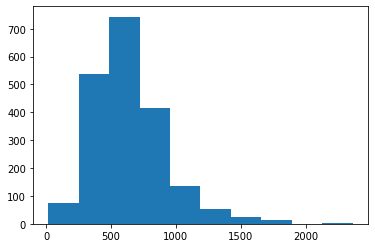

In [14]:
plt.hist(doc_count)
plt.show() 

vii. To represent each text (= data point), there are many ways. In NLP/Deep
Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word
in the text will be represented as 1, the second most common word will be
represented as 2, etc. Tokenize each text document using this method.2
viii. Select a review length L that 70% of the reviews have a length below it. If
you feel more adventurous, set the threshold to 90%.
ix. Truncate reviews longer than L words and zero-pad reviews shorter than L
so that all texts (= data points) are of length L.3

In [15]:
print(L) # L is calculated in b(v)

737.0


In [16]:
t2 = Tokenizer(num_words=5001)

In [17]:
t2.fit_on_texts(docs)

In [18]:
tokens_all = t2.texts_to_sequences(docs)

In [19]:
tokens_all = pad_sequences(tokens_all,maxlen=int(L), padding="post")

In [20]:
pos_tokens = tokens_all[0:1000]
neg_tokens = tokens_all[-1000:]

In [21]:
x_train_tokens = np.concatenate((pos_tokens[0:700], neg_tokens[0:700]))
x_test_tokens = np.concatenate((pos_tokens[700:1000], neg_tokens[700:1000]))

In [22]:
x_train_tokens[0]

array([  98,   79, 1079, 3641,  129,    5,    2, 1967,  782, 3642,    3,
        102, 1397,   36,   74,   55,   24, 1328,   26,    4,    1,  473,
       1261,   16,   13,  704, 1512,    5,   82,   54,    7,   34,   95,
          3,   33, 4340,  572,    1,  620,  237,    1,   27,    3,  188,
         41, 2110,    2,   27,   12,    1, 1079, 1427,    8, 2307,   19,
          2,   78,  702,  353,   16, 1694,    9,    7,    2,   78,  106,
       3844,   44,    6,   48,  141,   14,  455,   24,   56, 3557,   26,
          5, 1194,  191,   18, 1284,   67,   44,  505,    5,  867,    1,
        879,   11,  171,  387,    3,  118,  335, 4070,   16,   52,   20,
         61,    3,  106,  732,    4,  250,   37, 2745,    4,   67,    3,
        110, 1755,   50,  241,   14,   26,   36,  242,    5,   32,  598,
         14,  266, 3738, 1272,   16, 2858,    9, 2272,   38,   48,   20,
          1,  456,   11,    1,   27,   83,   23,  338,  341,    6,    8,
         23,  311,   91,    9,  421,   99, 1231,   

In [23]:
y_train_tokens = np.asarray([1] * 700 + [0]*700)
y_test_tokens = np.asarray([1]*300 + [0]*300)

In [24]:
len(x_train_tokens[0])

737

## (c) Word Embeddings

i

In [25]:
model = Sequential()

In [26]:
top_words = 5000 + 1
max_words = int(L)

In [27]:
embedding_layer = Embedding(top_words, 32 ,input_length=max_words)
model.add(embedding_layer)

In [28]:
model.add(Flatten())

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160032    
                                                                 
 flatten (Flatten)           (None, 23584)             0         
                                                                 
Total params: 160,032
Trainable params: 160,032
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
embeddings = model.predict(x_train_tokens)
print(embeddings.shape)

(1400, 23584)


ii. Flatten the matrix of each document to a vector.

## (d) Multi-Layer Perceptron
i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs
and one output layer with a single sigmoid neuron. Use a dropout rate of
20% for the first layer and 50% for the other layers. Use ADAM optimizer
and binary cross entropy loss (which is equivalent to having a softmax in the
output). To avoid overfitting, just set the number of epochs as 2. Use a batch
size of 10.

In [31]:
model.add(Dense(50, activation="relu"))
model.add(Dropout(.2))
model.add(Dense(50, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(50, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

In [32]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160032    
                                                                 
 flatten (Flatten)           (None, 23584)             0         
                                                                 
 dense (Dense)               (None, 50)                1179250   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2

In [96]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [97]:
model.fit(x_train_tokens, y_train_tokens, epochs=2, batch_size=10)

Epoch 1/2
140/140 [==============================] - 2s 7ms/step - loss: 0.2953 - accuracy: 0.9371
Epoch 2/2
140/140 [==============================] - 1s 7ms/step - loss: 0.0468 - accuracy: 0.9821


In [98]:
train_results = model.evaluate(x_train_tokens, y_train_tokens, batch_size=10)
test_results = model.evaluate(x_test_tokens, y_test_tokens, batch_size=10)

60/60 [==============================] - 0s 2ms/step - loss: 1.5486 - accuracy: 0.7350


ii. Report the train and test accuracies of this model.

Test accuracy is around 0.9993 and training accuracy is 0.735 for the MLP classifier.

## (e) One-Dimensional Convolutional Neural Network:
Although CNNs are mainly used for image data, they can also be applied to text
data, as text also has adjacency information. Keras supports one-dimensional
convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.
i. After the embedding layer, insert a Conv1D layer. This convolutional layer
has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded
word representations 3 vector elements of the word embedding at a time. The
convolutional layer is followed by a 1D max pooling layer with a length and
stride of 2 that halves the size of the feature maps from the convolutional
layer. The rest of the network is the same as the neural network above

In [37]:
model_conv1d = Sequential()

In [38]:
model_conv1d.add(embedding_layer)

In [40]:
print(model_conv1d.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160032    
                                                                 
Total params: 160,032
Trainable params: 160,032
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
model_conv1d.add(Conv1D(filters=32, kernel_size=3, input_shape=( None, 737, 32)))

In [42]:
print(model_conv1d.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160032    
                                                                 
 conv1d (Conv1D)             (None, 735, 32)           3104      
                                                                 
Total params: 163,136
Trainable params: 163,136
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model_conv1d.add(MaxPool1D(strides=2))

In [44]:
model_conv1d.add(Flatten())

In [45]:
model_conv1d.add(Dense(50, activation="relu"))
model_conv1d.add(Dropout(.2))
model_conv1d.add(Dense(50, activation="relu"))
model_conv1d.add(Dropout(.5))
model_conv1d.add(Dense(50, activation="relu"))
model_conv1d.add(Dropout(.5))
model_conv1d.add(Dense(1, activation='sigmoid'))

In [91]:
model_conv1d.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
model_conv1d.fit(x_train_tokens, y_train_tokens, epochs=2, batch_size=10)

Epoch 1/2
140/140 [==============================] - 2s 8ms/step - loss: 0.0701 - accuracy: 0.9871
Epoch 2/2
140/140 [==============================] - 1s 8ms/step - loss: 0.0597 - accuracy: 0.9893


In [93]:
train_results = model_conv1d.evaluate(x_train_tokens, y_train_tokens, batch_size=10)
test_results = model_conv1d.evaluate(x_test_tokens, y_test_tokens, batch_size=10)

60/60 [==============================] - 0s 2ms/step - loss: 2.2433 - accuracy: 0.7433


ii. Report the train and test accuracies of this model.

The train accuracy is 0.9993 and test accuracy is 0.7433.

## (f) Long Short-Term Memory Recurrent Neural Network:
The structure of the LSTM we are going to use is shown in the following figure.

i. Each word is represented to LSTM as a vector of 32 elements and the LSTM
is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both
LSTM and the dense layer. Train the model using 10-50 epochs and batch
size of 10.

In [108]:
model_LSTM = Sequential()

In [109]:
model_LSTM.add(embedding_layer)

In [110]:
model_LSTM.add(LSTM(32))

In [111]:
print(model_LSTM.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160032    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
Total params: 168,352
Trainable params: 168,352
Non-trainable params: 0
_________________________________________________________________
None


In [112]:
model_LSTM.add(Dropout(.2))
model_LSTM.add(Dense(256, activation='relu'))

In [113]:
model_LSTM.add(Dropout(.2))

In [114]:
model_LSTM.add(Dense(1, activation='sigmoid'))

In [115]:
model_LSTM.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics=['accuracy'])
model_LSTM.fit(x_train_tokens, y_train_tokens, epochs=10, batch_size=10)

Epoch 1/10
140/140 [==============================] - 21s 131ms/step - loss: 0.6147 - accuracy: 0.6100
Epoch 2/10
140/140 [==============================] - 18s 131ms/step - loss: 0.5923 - accuracy: 0.6671
Epoch 3/10
140/140 [==============================] - 18s 131ms/step - loss: 0.5573 - accuracy: 0.6364
Epoch 4/10
140/140 [==============================] - 18s 132ms/step - loss: 0.5544 - accuracy: 0.6279
Epoch 5/10
140/140 [==============================] - 18s 132ms/step - loss: 0.5430 - accuracy: 0.6357
Epoch 6/10
140/140 [==============================] - 18s 131ms/step - loss: 0.5868 - accuracy: 0.6300
Epoch 7/10
140/140 [==============================] - 18s 132ms/step - loss: 0.5776 - accuracy: 0.6321
Epoch 8/10
140/140 [==============================] - 18s 131ms/step - loss: 0.5558 - accuracy: 0.6207
Epoch 9/10
140/140 [==============================] - 18s 131ms/step - loss: 0.5527 - accuracy: 0.6143
Epoch 10/10
140/140 [==============================] - 18s 129ms/step - l

In [116]:
train_results = model_LSTM.evaluate(x_train_tokens, y_train_tokens, batch_size=10)
test_results = model_LSTM.evaluate(x_test_tokens, y_test_tokens, batch_size=10)

60/60 [==============================] - 2s 35ms/step - loss: 0.7360 - accuracy: 0.6933


In [123]:
model_LSTM.fit(x_train_tokens, y_train_tokens, epochs=30, batch_size=10)

Epoch 1/30
140/140 [==============================] - 18s 132ms/step - loss: 0.3010 - accuracy: 0.9043
Epoch 2/30
140/140 [==============================] - 19s 132ms/step - loss: 0.3126 - accuracy: 0.8900
Epoch 3/30
140/140 [==============================] - 18s 132ms/step - loss: 0.3702 - accuracy: 0.8343
Epoch 4/30
140/140 [==============================] - 18s 132ms/step - loss: 0.3615 - accuracy: 0.8464
Epoch 5/30
140/140 [==============================] - 18s 132ms/step - loss: 0.4802 - accuracy: 0.7307
Epoch 6/30
140/140 [==============================] - 19s 132ms/step - loss: 0.5545 - accuracy: 0.6186
Epoch 7/30
140/140 [==============================] - 19s 132ms/step - loss: 0.5523 - accuracy: 0.6421
Epoch 8/30
140/140 [==============================] - 18s 132ms/step - loss: 0.5507 - accuracy: 0.6286
Epoch 9/30
140/140 [==============================] - 18s 132ms/step - loss: 0.5453 - accuracy: 0.6443
Epoch 10/30
140/140 [==============================] - 19s 133ms/step - l

In [124]:
train_results = model_LSTM.evaluate(x_train_tokens, y_train_tokens, batch_size=10)
test_results = model_LSTM.evaluate(x_test_tokens, y_test_tokens, batch_size=10)

60/60 [==============================] - 2s 36ms/step - loss: 0.9425 - accuracy: 0.7567


In [125]:
model_LSTM.fit(x_train_tokens, y_train_tokens, epochs=50, batch_size=10)

Epoch 1/50
140/140 [==============================] - 18s 132ms/step - loss: 0.0798 - accuracy: 0.9814
Epoch 2/50
140/140 [==============================] - 18s 132ms/step - loss: 0.0992 - accuracy: 0.9750
Epoch 3/50
140/140 [==============================] - 18s 132ms/step - loss: 0.0813 - accuracy: 0.9807
Epoch 4/50
140/140 [==============================] - 19s 133ms/step - loss: 0.0694 - accuracy: 0.9850
Epoch 5/50
140/140 [==============================] - 18s 132ms/step - loss: 0.0707 - accuracy: 0.9871
Epoch 6/50
140/140 [==============================] - 18s 132ms/step - loss: 0.0607 - accuracy: 0.9886
Epoch 7/50
140/140 [==============================] - 18s 131ms/step - loss: 0.0600 - accuracy: 0.9879
Epoch 8/50
140/140 [==============================] - 18s 132ms/step - loss: 0.0578 - accuracy: 0.9900
Epoch 9/50
140/140 [==============================] - 18s 132ms/step - loss: 0.0594 - accuracy: 0.9900
Epoch 10/50
140/140 [==============================] - 18s 132ms/step - l

In [126]:
train_results = model_LSTM.evaluate(x_train_tokens, y_train_tokens, batch_size=10)
test_results = model_LSTM.evaluate(x_test_tokens, y_test_tokens, batch_size=10)

60/60 [==============================] - 2s 37ms/step - loss: 2.0799 - accuracy: 0.7683


10 epochs: train accuracy: 0.9179, test accuracy: 0.6933
30 epochs: train accuracy: 0.9821, test accuracy: 0.7567
50 epochs: train accuracy: 0.9950, test accuracy: 0.7683
Train accuracy became very close to 100% passing 30 epochs, which leads to overfitting.